In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [183]:
px = 15
py = 10
#c = 6
c = px*py - 4
ty = 11
tx = 15
Ly = 1
Lx = 10
epsx = Ly/(2*py)
epsy = Ly/(2*py)

N = (px-2)*(py - 2)
M_4x = px - 2
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly


weightss = 0*np.random.rand(2*(N+M),1).reshape(-1,1)/(2*(N+M))
weights3 = 1*np.random.rand(3*(N+M),1).reshape(-1,1)/(1*(N+M))
#weights3 = np.ones_like(weights)
wx = weights3[:(N+M)].reshape(-1,1)
wy = weights3[(N+M):2*(N+M)].reshape(-1,1)
wp = weights3[2*(N+M):3*(N+M)].reshape(-1,1)
#weights3 /= np.sum(weights3)
rho = 1.0
mu = 1.0
vm = 1.0
Re = 1.0#Ly*vm*rho/mu
pm = 10
Eu = 1 #pm /(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)
N+M
Re

1.0

In [184]:
weights3[:N+M].shape

(146, 1)

In [185]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [186]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = np.linspace(epsx,Lx - epsx,px-2)
y_int =  np.linspace(epsy,Ly - epsy,py-2)
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x_int, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x_int, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros


xk = points(x_int,y_int)[0][:,0].reshape(-1,1)
yk = points(x_int,y_int)[0][:,1].reshape(-1,1)

xyk1 = np.concatenate((xk,yk),axis = 1)
xykf1 = np.concatenate((xf1.reshape(-1,1), np.zeros_like(xf1).reshape(-1,1)),axis = 1)
xykf2 = np.concatenate((xf2.reshape(-1,1), np.ones_like(xf2).reshape(-1,1)*Ly),axis = 1)
xykf3 = np.concatenate((np.zeros_like(yf3).reshape(-1,1),yf3.reshape(-1,1)),axis = 1)
xykf4 = np.concatenate((np.ones_like(yf4).reshape(-1,1)*Lx,yf4.reshape(-1,1)),axis = 1)
xyk1 = np.concatenate((xyk1,xykf1,xykf2,xykf3,xykf4),axis = 0)

#Puntos test
x_test = np.linspace(0,Lx,tx)
y_test = np.linspace(0,Ly,ty)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x_int,y_int)[0][:,0].reshape(-1,1)
y_vector = points(x_int,y_int)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)


x_vector.shape

(104, 1)

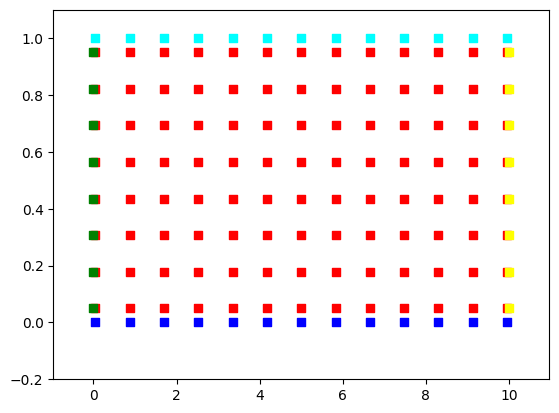

In [187]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3 - Lx/px,Lx + Lx/px + 0.3 ])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(xyk1[:,0],xyk1[:,1], color = 'black')
plt.show()

In [188]:
#Quitamos esquinas
#xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
#yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
#xyk1 = np.concatenate((xk,yk),axis = 1)
#xyk1 = np.delete(xyk1, [0,px-1,px*(py-1),px*py-1], axis = 0)
#xyk1.shape
XC, YC = np.meshgrid(xyk1[:,0],xyk1[:,1])

In [189]:
xyk1.shape

(146, 2)

In [190]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [191]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]
euclidian_dist_centers = euclidian_distance(xyk1[:,0],xyk1[:,1],xyk1,c)[0]



euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
euclidian_dist_border3.shape

(8, 146)

In [192]:
euclidian_dist_int.shape

(104, 146)

In [193]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_int
i , j = np.where(euclidian_dist_int == 0)
i
x_vector_int

array([0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.875,
       0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 1.7  , 1.7  ,
       1.7  , 1.7  , 1.7  , 1.7  , 1.7  , 1.7  , 2.525, 2.525, 2.525,
       2.525, 2.525, 2.525, 2.525, 2.525, 3.35 , 3.35 , 3.35 , 3.35 ,
       3.35 , 3.35 , 3.35 , 3.35 , 4.175, 4.175, 4.175, 4.175, 4.175,
       4.175, 4.175, 4.175, 5.   , 5.   , 5.   , 5.   , 5.   , 5.   ,
       5.   , 5.   , 5.825, 5.825, 5.825, 5.825, 5.825, 5.825, 5.825,
       5.825, 6.65 , 6.65 , 6.65 , 6.65 , 6.65 , 6.65 , 6.65 , 6.65 ,
       7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 8.3  ,
       8.3  , 8.3  , 8.3  , 8.3  , 8.3  , 8.3  , 8.3  , 9.125, 9.125,
       9.125, 9.125, 9.125, 9.125, 9.125, 9.125, 9.95 , 9.95 , 9.95 ,
       9.95 , 9.95 , 9.95 , 9.95 , 9.95 ])

In [194]:
euclidian_dist_int.shape
#px*py

(104, 146)

In [195]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(yf4)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(yf4,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(yf4)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(yf4,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)

gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(yf3),euclidian_dist_border3)
gyy_b3 = tpsdyy(yf3,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(yf3),euclidian_dist_border3)
gy_b3 = tpsdy(yf3,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(xf2,euclidian_dist_border2)
gxx_b1 = tpsdxx(xf1,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(xf1),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(xf1),euclidian_dist_border1)


print(gb1.shape)

(13, 146)


In [196]:
phidphidx = np.array([(g_int[i,:].reshape(-1,1) @ gx_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])
phidphidy = np.array([(g_int[i,:].reshape(-1,1) @ gy_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])

phidphidx_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gx_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidy_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gy_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidx_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gx_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])
phidphidy_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gy_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])

#phidphidy_b4.shape


In [197]:
wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
g_int.shape
#wx.shape
#weights3.shape[0]/3
#wx.shape
#gxx_int.shape
#( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) )

(104, 146)

In [198]:
wx = weights3[:((N+M))].reshape(-1,1)
wy = weights3[((N+M)):2*((N+M))].reshape(-1,1)
wp = weights3[2*((N+M)):3*((N+M))].reshape(-1,1)
wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    #print(wp[-1])
    

    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
F_01 =  1*( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
F_02 = 1*( 1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + Eu*np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten()
        #Ecuacion de continuidad
F_03 = 1*(np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
F_04 = 1*( np.dot( gb2 , wx ) ).flatten()
F_05 = 1*(np.dot(gb1,wx)).flatten()
F_06 = 1*(np.dot(gb3,wx) - 1.0/vm).flatten()

    
        #Condiciones de uy
F_07 = 1*(np.dot(gb2,wy)).flatten() 
F_08 = 1*(np.dot(gb1,wy)).flatten()
F_09 = 1*(np.dot(gb3,wy)).flatten()

    #Condiciones de p
F_010 = 1*(np.dot(gb3,wp)).flatten()
#Ecuaciones diferenciales en las fronteras
    #Ecuaciones en frontera de salida
F_011 = 1*(np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
F_012 = 1*(np.dot(gx_b4,wy)).flatten()
F_013 = 1*( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
    #Ecuacion en frontera superior
F_014 = 1*( 1/Re*(-np.dot(gxx_b2,wy) - np.dot(gyy_b2,wy)) + Eu*np.dot(gy_b2,wp)).flatten()
    #Ecuacion en frontera inferior
F_015 = 1*( 1/Re*(-np.dot(gxx_b1,wy) - np.dot(gyy_b1,wy)) + Eu*np.dot(gy_b1,wp)).flatten()

In [199]:
def StationaryNavierStokess(weights):
    F = np.zeros((3*N+ 4*M_4x,1))
    return F

In [215]:
def NavierStokess(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    F = np.zeros(((3*N+ 4*(M_4x) + 6*(M_4y)),))
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F[0:N] +=  1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*(-pm)/beta 
                       + np.dot(phidphidx,wxiwxj)/beta + np.dot(phidphidy,wyiwxj)
                       ).flatten()#/F_01.mean()
        #   Ecuacione en y
    F[N:2*N] += 1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) 
                   + Eu*0 + np.dot(phidphidx,wxiwyj)/beta + np.dot(phidphidy,wyiwyj)
                   ).flatten() #/F_02.mean()
        #Ecuacion de continuidad8u9
    F[2*N:3*N] += 2*(np.dot(gx_int,wx)/beta + np.dot(gy_int,wy)).flatten()#/F_03.mean()
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = 1*( np.dot( gb2 , wx ) ).flatten()#/F_04.mean()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = 1*(np.dot(gb1,wx)).flatten()#/F_05.mean()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) : 3*N + 3 * ( M_4x )] = 1*(np.dot(gb2,wy)).flatten()#/F_07.mean()
    F[3*N + 3 * ( M_4x ):3*N + 4 * ( M_4x ) ] = 1*(np.dot(gb1,wy)).flatten()#/F_08.mean()

    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) :  3*N + 4 * ( M_4x ) + (M_4y)] = 2*(np.dot(gx_b4,wx)/beta + np.dot(gy_b4,wy)).flatten()#/F_011.mean()
    F[3*N + 4 * ( M_4x ) + 1 * (M_4y):3*N + 4 * ( M_4x ) + 2 * (M_4y)] = 1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*(-pm)/beta
                                                                                 + np.dot(phidphidx_b4,wxiwxj)/beta + np.dot(phidphidy_b4,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y) ] = 1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)) 
                                                                             + np.dot(phidphidx_b4,wxiwyj)/beta + np.dot(phidphidy_b4,wyiwyj) 
                                                                             ).flatten()#/F_014.mean()
    F[3*N + 4 * ( M_4x ) + 3 * (M_4y):3*N + 4 * ( M_4x ) + 4 * (M_4y)] = 1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)) 
                                                                            + np.dot(phidphidx_b3,wxiwyj)/beta + np.dot(phidphidy_b3,wyiwyj) 
                                                                            ).flatten()#/F_015.mean()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = 1/(pm)*( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) + Eu*(-pm)/beta
                                                                                 + np.dot(phidphidx_b3,wxiwxj)/beta + np.dot(phidphidy_b3,wyiwxj)
                                                                                 ).flatten()#/F_013.mean()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = 2*(np.dot(gx_b3,wx)/beta + np.dot(gy_b3,wy)).flatten()
    return 1*(F) #,F.shape
    
    

In [201]:
from scipy.optimize import approx_fprime
from numpy.linalg import cond, norm
Re = 1
x0 = 0*weightss.reshape(-1)
def residual_func(w):
    return NavierStokess(w)

# Use finite differences to approximate Jacobian
epsilon = np.sqrt(np.finfo(float).eps)
J = np.zeros((len(residual_func(x0)), len(x0)))
print(epsilon)
for i in range(len(x0)):
    e = np.zeros_like(x0)
    e[i] = epsilon
    J[:, i] = (residual_func(x0 + e) - residual_func(x0)) / epsilon

condition_number = cond(J)
print("Jacobian condition number:", condition_number)

1.4901161193847656e-08


Jacobian condition number: 110895142.70293124


In [202]:

s = np.linalg.svd(J, compute_uv=False)
print("Smallest singular value:", s.min())
print("Largest singular value:", s.max())
print("Condition number:", s.max() / s.min())

Smallest singular value: 0.001965988710532725
Largest singular value: 218018.59860687834
Condition number: 110895142.70293124


In [203]:
a = NavierStokess(weightss)
print("Max = ",np.max(np.abs(a)), "\n", "Min = ", np.min(np.abs(a)), "\n", "Mean = ", np.mean(np.abs(a)), "\n", "Std = ", np.std(np.abs(a)))
print(np.where(np.abs(a) > 1e3))

Max =  0.1 
 Min =  0.0 
 Mean =  0.02912621359223301 
 Std =  0.045434403715718795
(array([], dtype=int64),)


In [210]:
from scipy.optimize import least_squares
Re = 2000

# Define el vector inicial
x0 = 0*(weightss.reshape(-1) ) # tamaño_total = tamaño del vector weights
#print( NavierStokess(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, jac = '2-point', method='lm',verbose = 2)  

`ftol` termination condition is satisfied.
Function evaluations 71248, initial cost 2.2400e+06, final cost 1.1988e+02, first-order optimality 2.12e+02.


In [107]:
from scipy.optimize import least_squares
Re = 200
# Define el vector inicial
x0 = resultado2.x.reshape(-1) #0*(resultado2.x.reshape(-1) + np.random.rand(resultado2.x.shape[0])*np.mean(resultado2.x)*10) # tamaño_total = tamaño del vector weights
print( NavierStokess(weightss).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, jac = '3-point', method='trf',verbose = 2) 

True


KeyboardInterrupt: 

In [211]:
np.where(NavierStokess(resultado2.x) > 1)
#NavierStokess(resultado2.x)
NavierStokess(resultado2.x).shape

(412,)

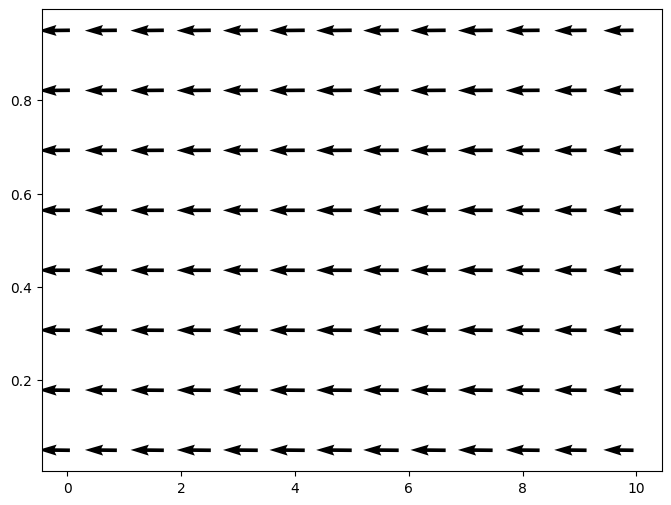

In [212]:
ux2 = beta*tps_rbf(euclidian_dist_int) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_int) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux2.reshape(px-2,py-2).T, uy2.reshape(px-2,py-2).T)

-18.645173825316068

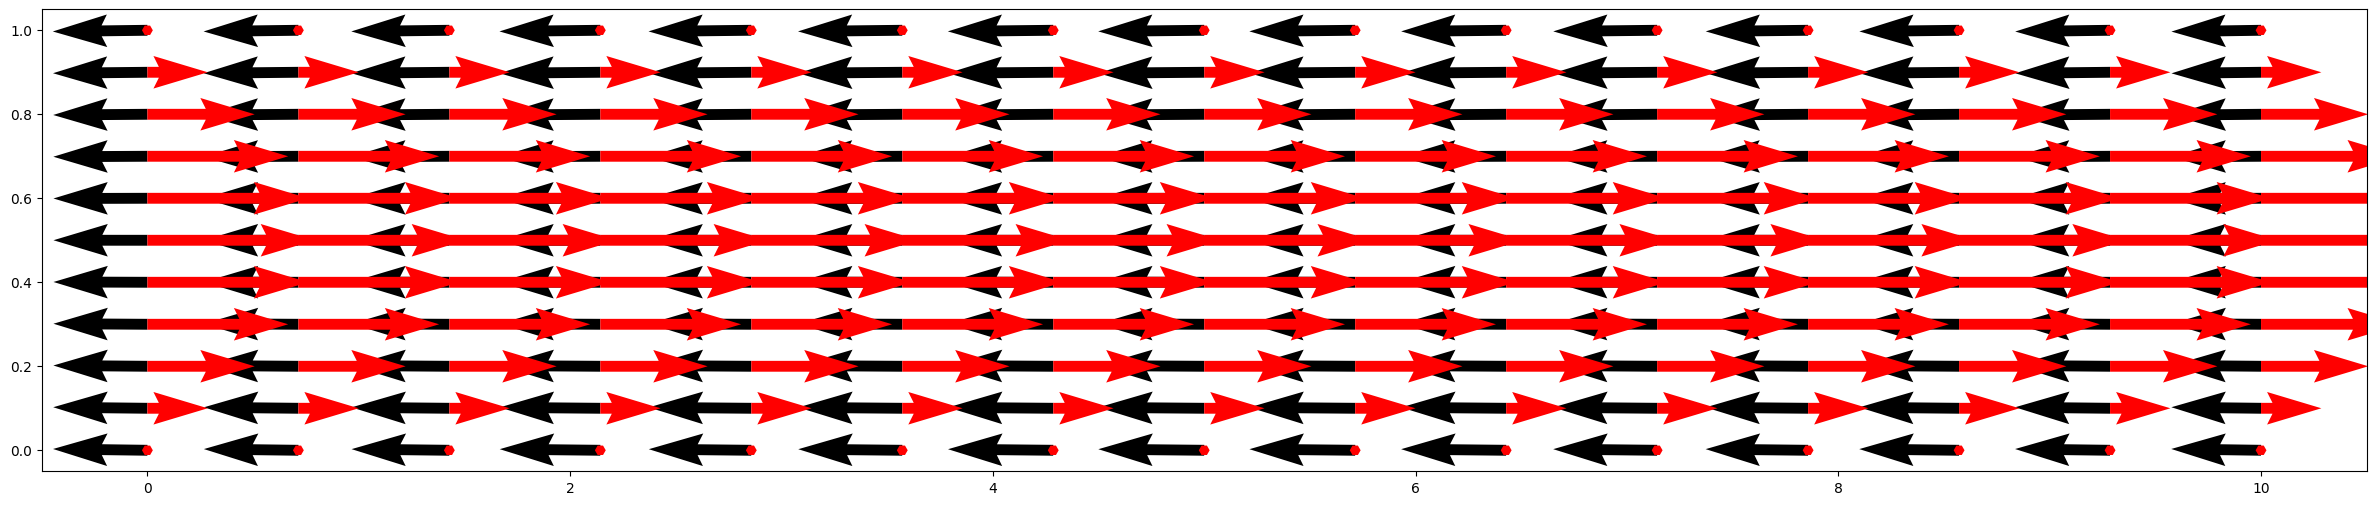

In [213]:
ux2 = beta*tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
#print(np.max(uy2))
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux2.reshape(tx,ty).T, uy2.reshape(tx,ty).T)
ax.quiver(Xt, Yt, -pm/2*Re*(Yt**2 - Ly*Yt), 0, color = 'red')
np.max(ux2)

ERROR Medio: 101.23317804269945 %
Error Maximo 102.18572683493821 %
V numérico maximo -19.571685060400938
V analitico maximo 2500.0
Error medio total 101.34339216284044 %


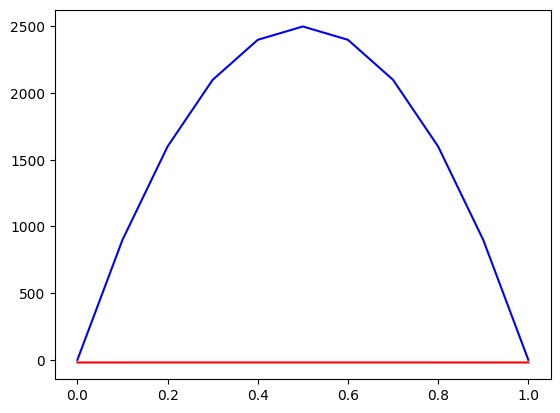

In [214]:
ppp = 0
print("ERROR Medio:",np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("Error Maximo", np.max( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("V numérico maximo", np.max(ux2.reshape(tx,ty).T[1:-1,ppp]))
print("V analitico maximo", np.max(-Re*pm/2*(y_test**2 - Ly*y_test)[1:-1]))
e = np.mean([np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,i] - (-pm/2*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-pm/2*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100 for i in range(1,ty-1)])
print("Error medio total",e, "%")
plt.plot(y_test,ux2.reshape(tx,ty).T[:,ppp] , color = 'red')
plt.plot(y_test,-Re*pm/2*(y_test**2 - Ly*y_test), color = 'blue')

In [ ]:

def NavierStokessUP(weights):
        
    wx = weights[:((N+M))].reshape(-1,1)
    wy = weights[((N+M)):2*((N+M))].reshape(-1,1)
    wp = weights[2*((N+M)):3*((N+M))].reshape(-1,1)
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    #print(wp[-1])
    
    F = np.zeros(((3*N+ 6*(M_4x) + 6*(M_4y)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  1*( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) + Eu*np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()/(F_01)
        #   Ecuacione en y
    F[N:2*N] += ( 1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + Eu*np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten()/F_02
        #Ecuacion de continuidad
    F[2*N:3*N] += 50*(np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()/F_03
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = 1*( np.dot( gb2 , wx ) ).flatten()/F_04
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = 1*(np.dot(gb1,wx)).flatten()/F_05
    F[3*N + 2 * ( M_4x ):3*N + 2 * ( M_4x ) + (M_4y)] = 5*(np.dot(gb3,wx) - 1.0).flatten()/F_06
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) + M_4y : 3*N + 3 * ( M_4x ) + M_4y] = 1*(np.dot(gb2,wy)).flatten()/F_07
    F[3*N + 3 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + M_4y] = 1*(np.dot(gb1,wy)).flatten()/F_08
    F[3*N + 4 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + 2 * (M_4y)] = 5*(np.dot(gb3,wy)).flatten()/F_09
    
        #Condiciones de p
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y)] = 1*(np.dot(gb3,wp)).flatten()/F_010
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) + 3 * (M_4y) :  3*N + 4 * ( M_4x ) + 4 * (M_4y)] = 10*(np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()/F_011
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = 10*(np.dot(gx_b4,wy)).flatten()/F_012
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = 10*( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) + Eu*np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()/F_013
        #Ecuacion en frontera superior
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 5 * ( M_4x ) + 6 * (M_4y) ] = 10*( 1/Re*(-np.dot(gxx_b2,wy) - np.dot(gyy_b2,wy)) + Eu*np.dot(gy_b2,wp)).flatten()/F_014
        #Ecuacion en frontera inferior
    F[3*N + 5 * ( M_4x ) + 6 * (M_4y):3*N + 6 * ( M_4x ) + 6 * (M_4y)] = 10*( 1/Re*(-np.dot(gxx_b1,wy) - np.dot(gyy_b1,wy)) + Eu*np.dot(gy_b1,wp)).flatten()/F_015
    return F#,F.shape
    
    

In [ ]:
#np.where(NavierStokessUP(weights3) == 0)
NavierStokessUP(weights3).shape[0]
weights3.reshape(-1).shape[0]
x0 = (weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
#np.where(NavierStokessUP(weights3) == 0)

True


In [ ]:
from scipy.optimize import least_squares
#weights3 = 0*np.random.rand(3*(N+M),1).reshape(-1,1)/(3*(N+M)) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)/(2*(N+M))
# Define el vector inicial
x0 = (0*weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3 = least_squares(NavierStokessUP, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3229e-05                                    6.13e-01    
       1              2         3.8003e-07      1.28e-05       1.00e+00       2.73e-07    
       2              3         2.9821e-07      8.18e-08       2.00e+00       9.49e-02    
       3              4         2.1726e-07      8.10e-08       4.00e+00       9.23e-01    
       4              7         2.0408e-07      1.32e-08       5.00e-01       1.15e+00    
       5              8         1.8784e-07      1.62e-08       5.00e-01       1.22e-02    
       6             10         1.8547e-07      2.37e-09       2.50e-01       2.05e-01    
       7             11         1.8241e-07      3.06e-09       2.50e-01       5.24e-02    
       8             12         1.8003e-07      2.37e-09       2.50e-01       7.00e-01    
       9             13         1.7687e-07      3.16e-09       2.50e-01       3.26e-0

In [ ]:
resultado3.x[:N+M] ** 2

array([4.39826492e+00, 6.86493840e+00, 9.11204760e-01, 8.16154098e-01,
       2.77844154e+00, 4.22929915e+00, 2.23069373e-01, 4.13927771e-02,
       9.08477796e-01, 1.63539108e+00, 3.09157708e-02, 2.66272897e-01,
       9.10389737e-03, 1.57955918e-03, 1.89370602e-02, 2.17657149e-03,
       2.32180133e-03, 2.41099280e-03, 1.29009117e-03, 1.88159177e-06,
       5.16237165e-04, 1.38310378e-03, 4.49130524e-06, 5.00637502e-05,
       2.12130096e-04, 5.81187372e-07, 1.27879059e-04, 8.06329672e-04,
       3.56571390e-04, 5.81881987e-03, 3.81466131e-04, 5.09830404e-04,
       1.97614035e-03, 1.31730924e-03, 1.04236935e-02, 1.85598156e-02,
       6.10550135e-05, 1.00289438e-03, 8.40181034e-04, 2.48242091e-03,
       3.12484638e-04, 1.29361874e-03, 3.98476682e-04, 2.94837997e-03,
       1.08533166e-03, 5.74105637e-03, 1.19065599e-04, 4.09004010e-04,
       1.43856194e-03, 2.17436847e-03, 3.22986298e-03, 2.81945557e-03,
       6.74770472e-05, 1.91908506e-06, 2.90025685e-05, 6.16514851e-04,
      

In [ ]:
from scipy.optimize import least_squares

# Define el vector inicial
x0 = (resultado3.x.reshape(-1) + np.random.rand(resultado3.x.shape[0])*np.mean(resultado3.x)*0.1 ) # tamaño_total = tamaño del vector weights

print( NavierStokessUP(x0).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3_1 = least_squares(NavierStokessUP, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5275e-06                                    4.38e+01    
       1              2         6.8380e-07      1.84e-06       1.09e+01       1.41e+01    
       2              3         4.7408e-07      2.10e-07       2.18e+01       6.79e+00    
       3              5         2.3610e-07      2.38e-07       5.44e+00       4.62e+00    
       4              6         2.0941e-07      2.67e-08       5.44e+00       3.49e-01    
       5              9         1.6816e-07      4.12e-08       3.40e-01       1.84e+00    
       6             10         1.5625e-07      1.19e-08       3.40e-01       2.45e-01    
       7             14         1.5588e-07      3.70e-10       5.32e-03       1.68e-03    
       8             15         1.5581e-07      6.77e-11       1.33e-03       7.18e-03    
       9             16         1.5581e-07      5.63e-12       3.32e-04       1.75e-0

In [284]:
ux3 = tps_rbf(euclidian_dist_int) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_int) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_int) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux3.reshape(px-2,py-2).T, uy3.reshape(px-2,py-2).T)

NameError: name 'resultado3' is not defined

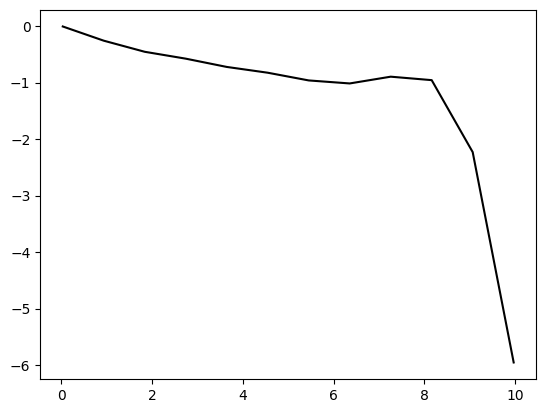

In [ ]:
plt.plot(x_int,p3.reshape(px-2,py-2).T[1,:],color = 'black')

ERROR: 2003.1799417306029 %
Vmaximo numérico 1.5145259260652892


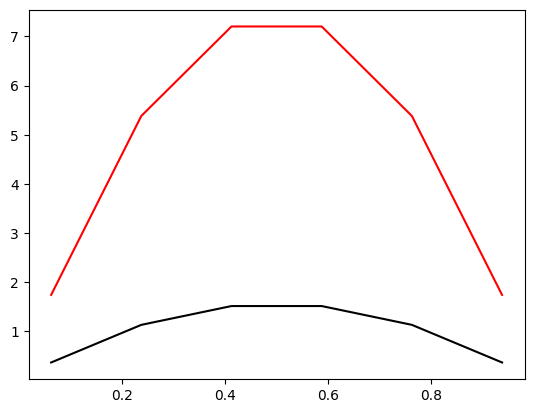

In [ ]:
print("ERROR:",np.mean( np.abs((ux3.reshape(px-2,py-2).T[:,3] - (-1/2*(p3[0] - p3[-1])/Lx*(y_int**2 - Ly*y_int))) /( -1/2*(p3[0] - p3[-1])/Lx*(y_int**2 - Ly*y_int)   )  ) ) *100,'%')
print("Vmaximo numérico", np.max(ux3.reshape(px-2,py-2).T[:,3]))
plt.plot(y_int,ux3.reshape(px-2,py-2).T[:,3],color = 'black')
plt.plot(y_int, -Re/2*(p3[0] - p3[-1])/(Lx)*(y_int**2 - Ly*y_int),color = 'red')

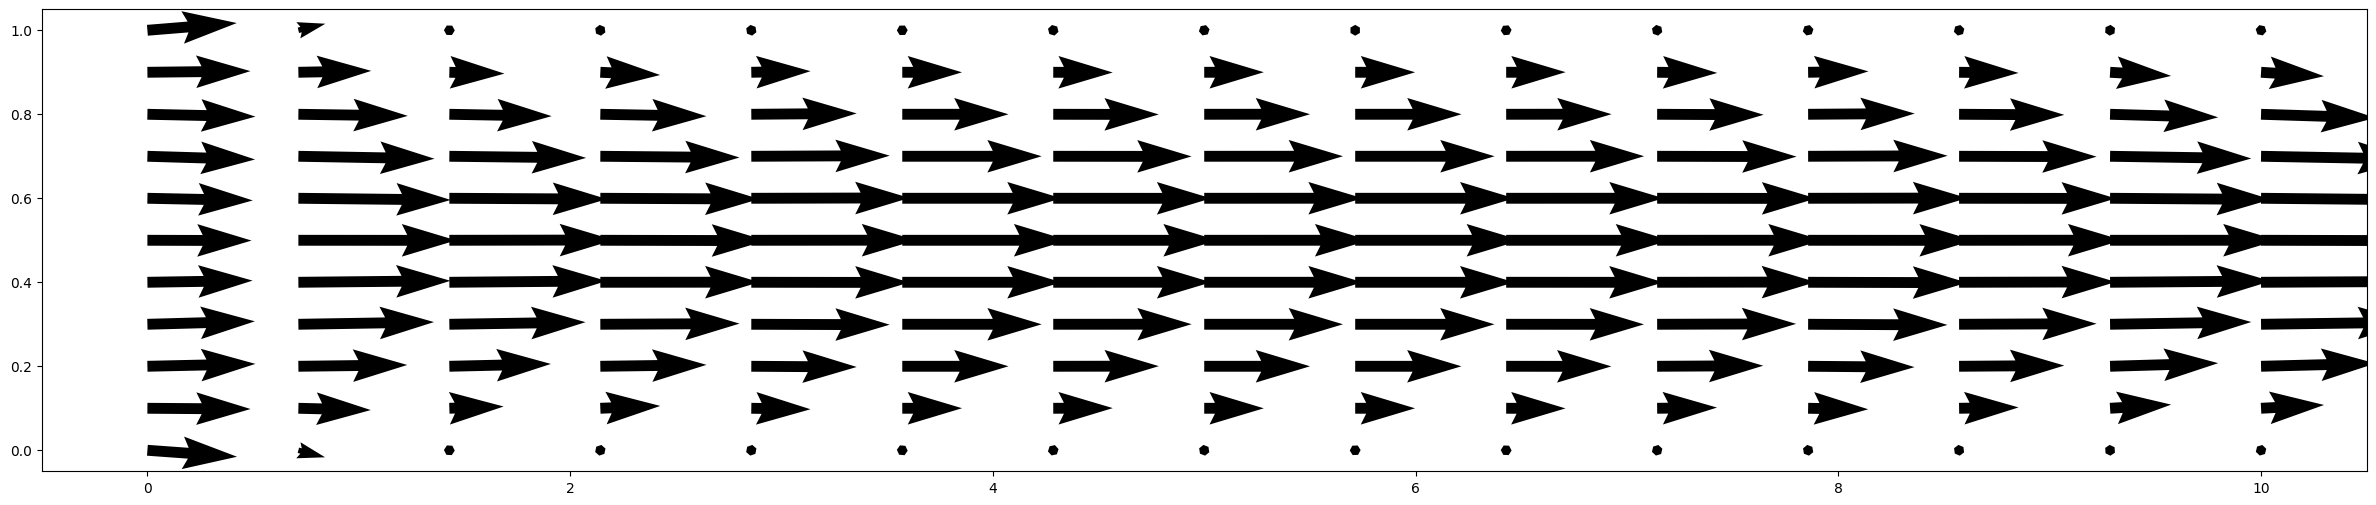

In [ ]:
ux3 = tps_rbf(euclidian_dist_test) @ resultado3.x[:N+M]
uy3 = tps_rbf(euclidian_dist_test) @ resultado3.x[N+M:2*(N+M)]
p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux3.reshape(tx,ty).T, uy3.reshape(tx,ty).T)

In [ ]:
p3[0] - p3[-1]

6.1351733245621745

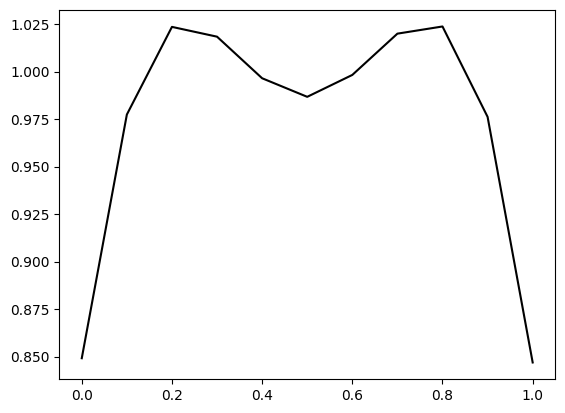

In [ ]:
plt.plot(y_test,ux3.reshape(tx,ty).T[:,0],color = 'black')

In [ ]:
best_result = None
best_cost = np.inf
for i in range(10):
    print("Iteración número:", 1+i)
    x0_random = np.random.randn(*x0.shape) * 0.1  # small noise
    result = least_squares(NavierStokessUP, x0_random, method='trf',verbose=2)
    
    if result.cost < best_cost:
        best_cost = result.cost
        best_result = result

Iteración número: 1
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.8067e+07                                    3.02e+08    
       1              2         6.7573e+03      9.81e+07       1.87e+00       2.12e+05    
       2              3         1.6036e+01      6.74e+03       3.75e+00       5.43e+03    
       3              4         4.2631e-04      1.60e+01       7.50e+00       1.84e+01    
       4              5         1.6975e-06      4.25e-04       1.50e+01       2.71e+01    
       5              6         2.9415e-07      1.40e-06       3.00e+01       7.72e+00    
       6             10         2.3309e-07      6.11e-08       9.37e-01       9.07e-01    
       7             11         1.9698e-07      3.61e-08       9.37e-01       1.43e+00    
       8             12         1.9188e-07      5.10e-09       9.37e-01       1.69e+00    
       9             13         1.8369e-07      8.18e-09       2.34e-0

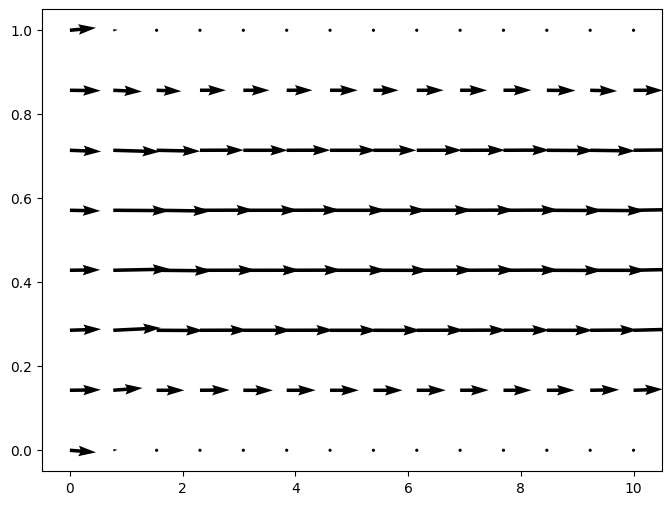

In [ ]:
ux33 = tps_rbf(euclidian_dist_complete) @ best_result.x[:N+M]
uy33 = tps_rbf(euclidian_dist_complete) @ best_result.x[N+M:2*(N+M)]
p33 = tps_rbf(euclidian_dist_complete) @ best_result.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(X, Y, ux33.reshape(px,py).T, uy33.reshape(px,py).T)
#plt.plot(y_int,p33.reshape(px-2,py-2).T[:,0],color = 'black')

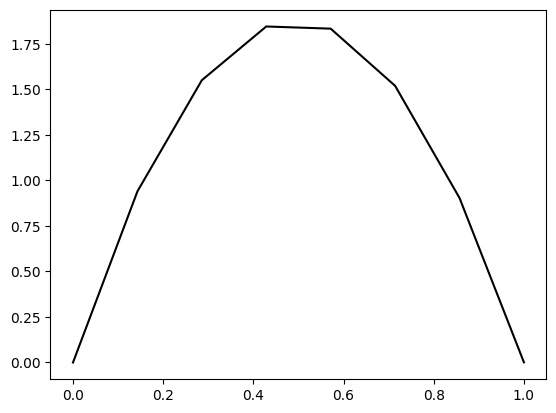

In [ ]:
plt.plot(y,ux33.reshape(px,py).T[:,6],color = 'black')

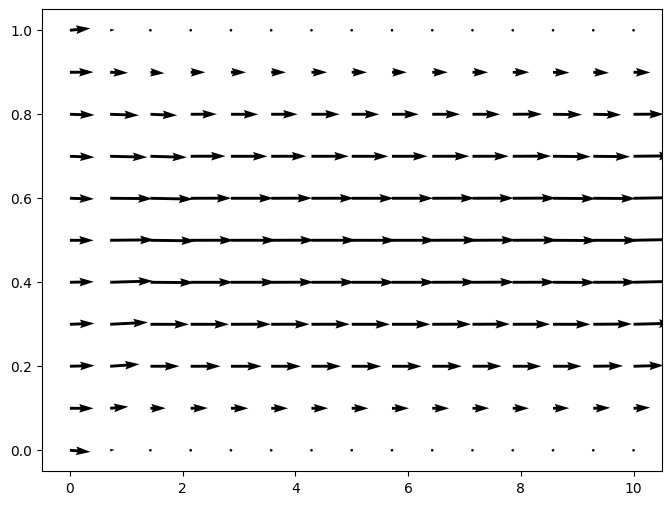

In [ ]:
ux33 = tps_rbf(euclidian_dist_test) @ best_result.x[:N+M]
uy33 = tps_rbf(euclidian_dist_test) @ best_result.x[N+M:2*(N+M)]
p33 = tps_rbf(euclidian_dist_test) @ best_result.x[2*(N+M):3*(N+M)]
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux33.reshape(tx,ty).T, uy33.reshape(tx,ty).T)


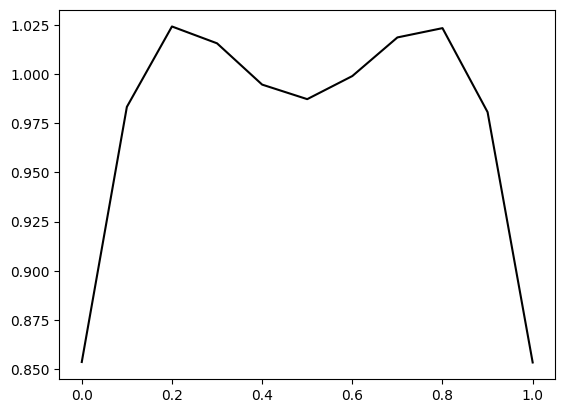

In [ ]:
plt.plot(y_test,ux33.reshape(tx,ty).T[:,0],color = 'black')

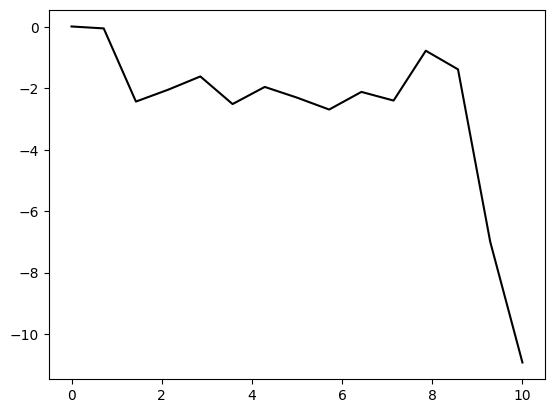

In [ ]:
plt.plot(x_test, p33.reshape(tx,ty).T[0,:],color = 'black')